In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


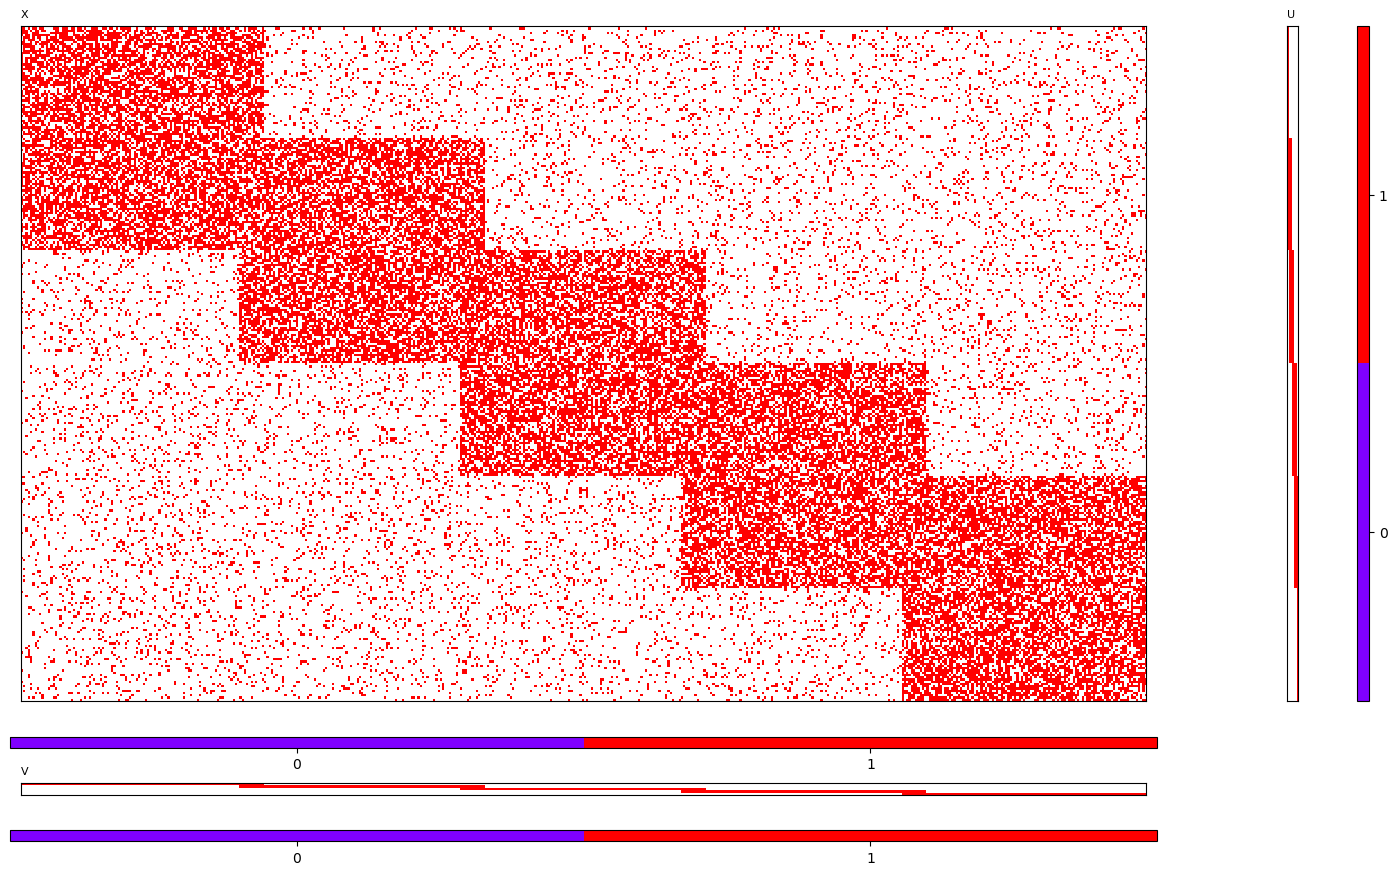

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [4]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 30295
[I]   val_size     : 4328
[I]   test_size    : 8656
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 106721
[I]   n_negatives  : 43279
[I]   train_size   : 30295
[I]   val_size     : 4328
[I]   test_size    : 8656
[I]   seed         : 2023


In [5]:
# shared params
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 10

# 1. Init with `NMFSklearn`

[I] k            : 10
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : mu
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\sklearn\decomposition\_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


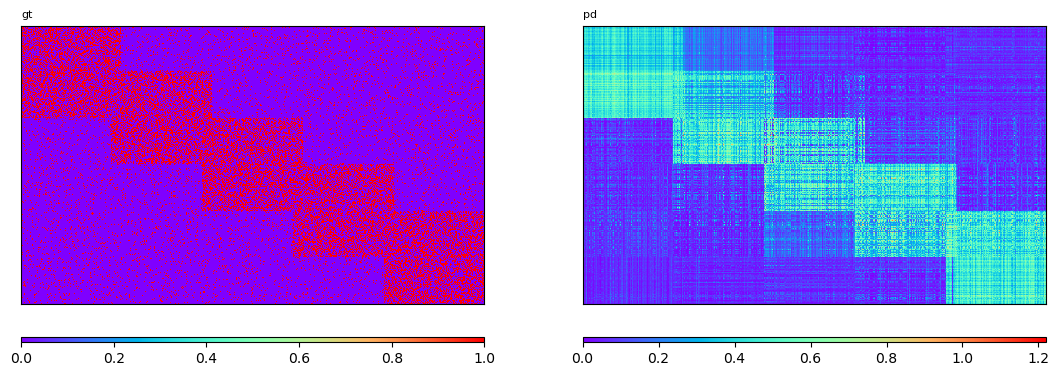

[I] model saved as: 24-06-22_21-53-21_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

In [6]:
from models import NMFSklearn

model_nmf = NMFSklearn(k=k, solver='mu', init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

U, V = model_nmf.U, model_nmf.V

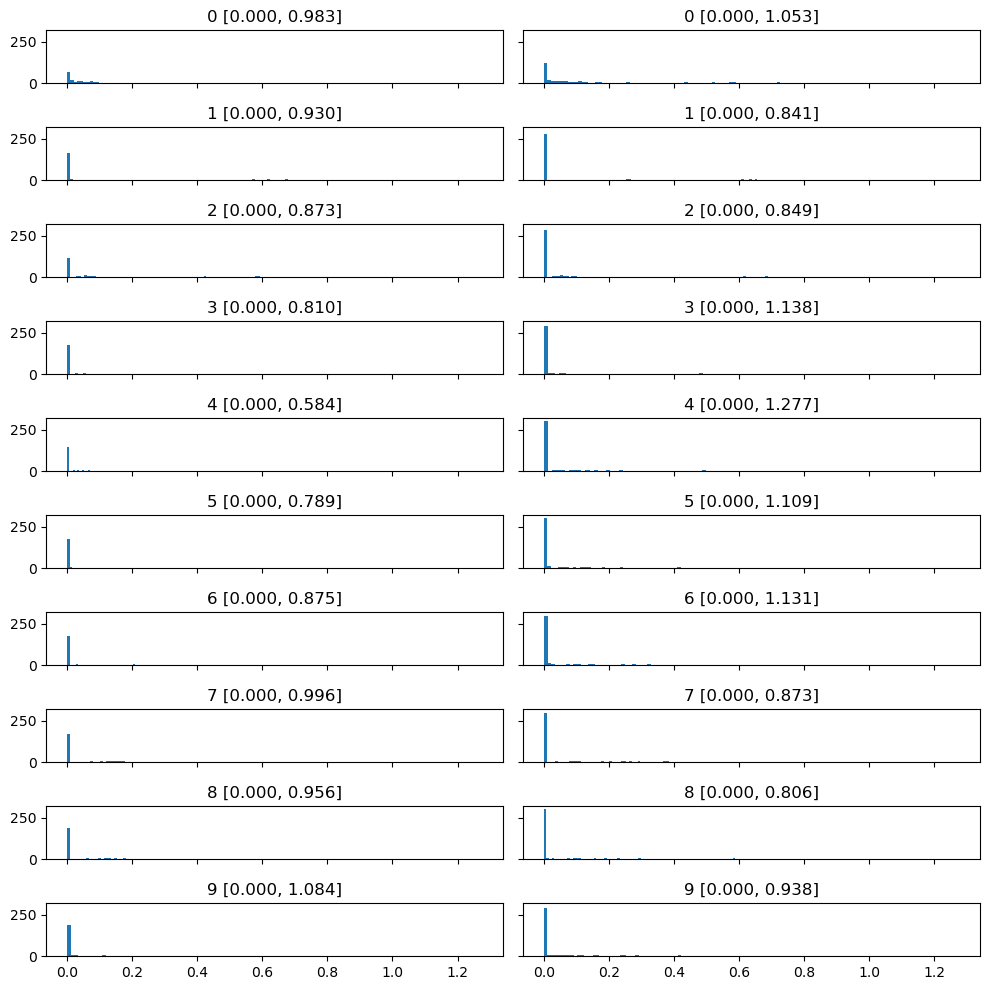

In [7]:
from utils import show_factor_distribution

show_factor_distribution(U=model_nmf.U, V=model_nmf.V, resolution=100)

# 2. Init with `WNMF`

In [8]:
# reg = 1
# reg_growth = 3

# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# 3. `BinaryMFThresholdExColumnwise` (Wolfe line search)

[I] k            : 10
[I] U            : (300, 10)
[I] V            : (500, 10)
[I] W            : full
[I] us           : 0.5
[I] vs           : 0.5
[I] lamda        : 5
[I] min_diff     : 0.0
[I] max_iter     : 30
[I] init_method  : custom
[I] solver       : line-search
[I] seed         : 1719064449
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 1.084414281526914] -> [0.0, 1.0], V: [0.0, 1.2765485600895006] -> [0.0, 1.0]
[I] iter: 1
[I]     Wolfe line search iter       : 1
[I]     num of function evals        : 17
[I]     num of gradient evals        : 3
[I]     function value update        : 12668.304 -> 12603.803
[I]     threshold update             :
[I]         [0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50]
[I]      -> [0.63, 0.60, 0.60, 0.59, 0.59, 0.58, 0.58, 0.58, 0.

\
                                                                                
                 time iter                                                 us   
0   22/06/24 09:54:11    0  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1   22/06/24 09:54:11    1  [0.6330849527167883, 0.5977135831599281, 0.601...   
2   22/06/24 09:54:11    2  [0.5925140406466338, 0.99999, 0.86452015929084...   
3   22/06/24 09:54:11    3  [0.6580461811438818, 0.99999, 0.91310644650593...   
4   22/06/24 09:54:12    4  [0.6754081791794937, 0.9170074666102581, 0.886...   
5   22/06/24 09:54:12    5  [0.7304410432646055, 0.9834010024237777, 0.920...   
6   22/06/24 09:54:12    6  [0.7586691370188459, 0.9735078547483842, 0.916...   
7   22/06/24 09:54:12    7  [0.99999, 0.99999, 0.9968361375824386, 0.90808...   
8   22/06/24 09:54:12    8  [0.9977150836111688, 0.9943799263492309, 0.968...   
9   22/06/24 09:54:12    9  [0.99999, 0.99999, 0.9694104810773769, 0.92197...   
10  22/06/24 09:54:13   10  [0.99999, 0.99999, 0.9603338761787558, 0.92997...   
11  22/06/24 09:54:13   11  [0.99999, 0.99999, 0.960171007939286, 0.934801...   
12  22/06/24 09:54:13   12  [0.99999, 0.99999, 0.9481049650088967, 0.96149...   
13  22/06/24 09:54:13   13  [0.99999, 0.99999, 0.9511195918536682, 0.96329...   
14  22/06/24 09:54:14   14  [0.99999, 0.99999, 0.9525857257151411, 0.96469...   
15  22/06/24 09:54:14   15  [0.99999, 0.99999, 0.9541465915911356, 0.96620...   
16  22/06/24 09:54:14   16  [0.99999, 0.99999, 0.9523034566633344, 0.96724...   
17  22/06/24 09:54:14   17  [0.99999, 0.99999, 0.9537223067194168, 0.96863...   
18  22/06/24 09:54:14   18  [0.99999, 0.99999, 0.9526155748974062, 0.96893...   
19  22/06/24 09:54:15   19  [0.99999, 0.99999, 0.953600606266491, 0.970506...   
20  22/06/24 09:54:15   20  [0.99999, 0.99999, 0.9525308191404505, 0.97030...   
21  22/06/24 09:54:15   21  [0.99999, 0.99999, 0.9527759313869991, 0.97227...   
22  22/06/24 09:54:15   22  [0.99999, 0.99999, 0.9509199742354353, 0.97197...   
23  22/06/24 09:54:16   23  [0.99999, 0.99999, 0.9519587775894319, 0.97305...   
24  22/06/24 09:54:16   24  [0.99999, 0.99999, 0.9508590426468725, 0.97318...   
25  22/06/24 09:54:16   25  [0.99999, 0.99999, 0.9518625460537371, 0.97464...   
26  22/06/24 09:54:16   26  [0.99999, 0.99999, 0.9506452208466931, 0.97427...   
27  22/06/24 09:54:16   27  [0.99999, 0.99999, 0.9509467869420754, 0.97527...   
28  22/06/24 09:54:17   28  [0.99999, 0.99999, 0.9496658163239285, 0.97524...   
29  22/06/24 09:54:17   29  [0.99999, 0.99999, 0.9503334445694417, 0.97607...   
30  22/06/24 09:54:17   30  [0.99999, 0.99999, 0.948464305969847, 0.976434...   
31  22/06/24 09:54:17   31  [0.99999, 0.99999, 0.9497481986603507, 0.97765...   

                                                                        train  \
                                                                            0   
                                                   vs             F    Recall   
0   [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...  10441.631138  0.209209   
1   [0.6257507781062546, 0.6187382812399833, 0.623...  12603.803449  0.209209   
2   [0.48763760348526186, 0.7703188459238798, 0.77...  12167.048064  0.209209   
3   [0.5485406555498705, 0.7787975463250738, 0.822...  11981.250871  0.209209   
4   [0.5139881435780825, 0.7151210397172267, 0.793...  11865.587693  0.209209   
5   [0.5459290360697017, 0.7477846421283103, 0.820...  11789.474106  0.209209   
6   [0.5428398742724293, 0.7342185271237989, 0.815...  11724.120444  0.209209   
7   [0.6222558276218824, 0.7570919372229149, 0.872...  11592.726386  0.209209   
8   [0.6134808303222198, 0.7495403066626065, 0.852...  11575.283491  0.209209   
9   [0.6145988109695788, 0.7566477209780419, 0.854...  11548.890029  0.209209   
10  [0.6104286257804763, 0.7573865883450865, 0.848...  11546.855097  0.209209   
11  [0.6097669207920959, 0.7602201767917544, 0.848...  11543.791979  0.209209   
12  [0.5978668247488147, 0.7

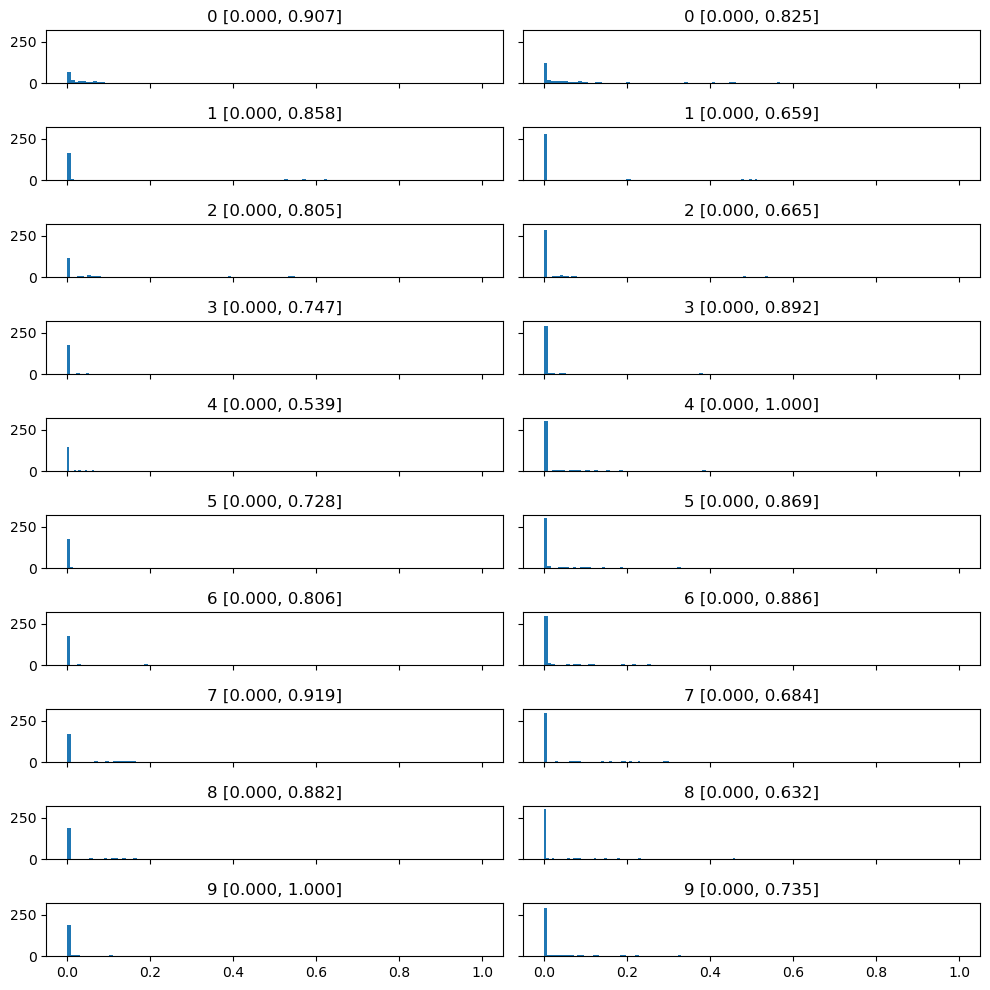

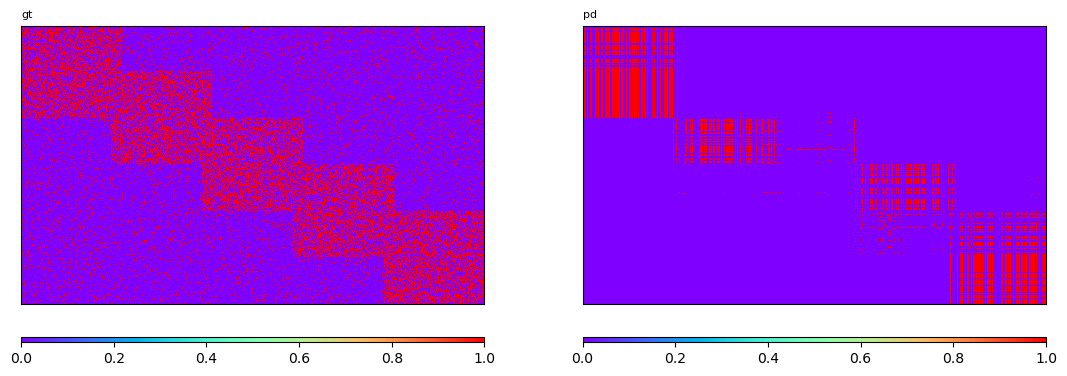

[I] model saved as: 24-06-22_21-54-20_BinaryMFThresholdExColumnwise.pickle


<Figure size 640x480 with 0 Axes>

In [10]:
from models import BinaryMFThresholdExColumnwise

us, vs = 0.5, 0.5
W = 'full'
init_method = 'custom'
min_diff = 0.0
max_iter = 30
lamda = 5

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, us=us, vs=vs, W=W, lamda=lamda, min_diff=min_diff, max_iter=max_iter, init_method=init_method)
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)

# 4. `BinaryMFThresholdExColumnwise` (coordinate descent)

[I] k            : 50
[I] U            : (300, 50)
[I] V            : (500, 50)
[I] W            : full
[I] min_diff     : 0.0
[I] max_iter     : 1000
[I] init_method  : custom
[I] seed         : 1714678884
[I] verbose      : False
[I] display      : False
[I] us           : 0.1
[I] vs           : 0.1
[I] lamda        : 10
[I] solver       : cd
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]


 95%|█████████▍| 0.9499172546260745/1.0 [01:12<00:03, 76.25s/it]   

[W] Stopped in advance: Reach maximum iteration


\
                                
                   time  iter   
0     03/05/24 03:41:24     1   
1     03/05/24 03:41:24     2   
2     03/05/24 03:41:24     3   
3     03/05/24 03:41:24     4   
4     03/05/24 03:41:25     5   
...                 ...   ...   
996   03/05/24 03:42:36   997   
997   03/05/24 03:42:36   998   
998   03/05/24 03:42:36   999   
999   03/05/24 03:42:36  1000   
1000  03/05/24 03:42:37  1001   

                                                         \
                                                          
                                                     us   
0     [0.10030485244755719, 0.10030947633157317, 0.1...   
1     [0.1006086496335472, 0.10061783465255018, 0.10...   
2     [0.1009113997555343, 0.10092508380962306, 0.10...   
3     [0.10121311091391787, 0.10123123254219228, 0.1...   
4     [0.10151379111347761, 0.10153628948411406, 0.1...   
...                                                 ...   
996   [0.2416423880874212, 0.23780344999639527, 0.23...   
997   [0.24172657464872213, 0.2378805951867615, 0.23...   
998   [0.24181071279326066, 0.23795768856092947, 0.2...   
999   [0.24189480259466445, 0.23803473019596058, 0.2...   
1000  [0.2419788441263899, 0.23811172016873824, 0.23...   

                                                                       \
                                                                        
                                                     vs             F   
0     [0.1002694625494325, 0.10027895905305265, 0.10...  2.214701e+06   
1     [0.1005380239831171, 0.10055697402217037, 0.10...  2.200711e+06   
2     [0.10080569075013358, 0.10083405182726635, 0.1...  2.186849e+06   
3     [0.10107246922902591, 0.10111019931078136, 0.1...  2.173114e+06   
4     [0.10133836572883805, 0.10138542323884811, 0.1...  2.159503e+06   
...                                                 ...           ...   
996   [0.22246257353965734, 0.227319766908466, 0.230...  1.030281e+05   
997   [0.2225308945186628, 0.2273919655326911, 0.230...  1.028475e+05   
998   [0.22259916843533895, 0.2274641166464916, 0.23...  1.026674e+05   
999   [0.22266739536001595, 0.22753622032101595, 0.2...  1.024877e+05   
1000  [0.2227355753628635, 0.22760827662724872, 0.23...  1.023085e+05   

         train                                
             0                                
        Recall Precision  Accuracy        F1  
0     0.926000  0.223857  0.835180  0.360551  
1     0.925468  0.224768  0.836087  0.361692  
2     0.925335  0.225142  0.836447  0.362166  
3     0.925203  0.225635  0.836913  0.362793  
4     0.924538  0.227070  0.838293  0.364594  
...        ...       ...       ...       ...  
996   0.702538  0.487104  0.947953  0.575314  
997   0.702538  0.487104  0.947953  0.575314  
998   0.702006  0.487499  0.948013  0.575411  
999   0.701608  0.488348  0.948140  0.575868  
1000  0.701608  0.488348  0.948140  0.575868  

[1001 rows x 9 columns]

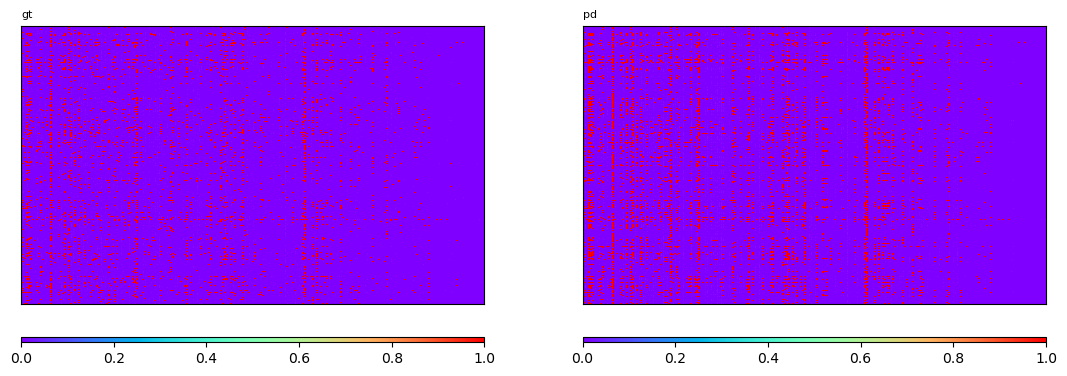

In [36]:
from models import BinaryMFThresholdExColumnwise

us, vs = 0.1, 0.1
W = 'full'
init_method = 'custom'
min_diff = 0.0
max_iter = 1000
lamda = 10

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, us=us, vs=vs, W=W, lamda=lamda, min_diff=min_diff, max_iter=max_iter, init_method=init_method, solver='cd')
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)

In [37]:
model.us

[0.2419788441263899,
 0.23811172016873824,
 0.23189126733984755,
 0.21750917437106118,
 0.2426390759471417,
 0.23023314286044422,
 0.2345280339331508,
 0.2230997476425253,
 0.2305937926437356,
 0.22669571340715625,
 0.21921238105796315,
 0.2195286195523778,
 0.22284817912613897,
 0.22702398021010323,
 0.22284034753233176,
 0.22217788539052827,
 0.2375042017002035,
 0.22933260196423264,
 0.23615021219947105,
 0.22422955945328651,
 0.22550273756020406,
 0.23261310627174664,
 0.23028015280635308,
 0.22173513737160774,
 0.2210615659956898,
 0.22819175433750835,
 0.22445698191002467,
 0.22149553848435818,
 0.22121419970839923,
 0.2378422097827841,
 0.23090885494785568,
 0.22954319475603174,
 0.2224107201561022,
 0.222898574787724,
 0.22040596857829267,
 0.22738760590976537,
 0.23407149198078864,
 0.2199984169649698,
 0.2328716851008745,
 0.22932104525419553,
 0.2229939563487403,
 0.21986862501280122,
 0.21937509431763746,
 0.23015742351563614,
 0.22348306870840612,
 0.22668380953877398,
 0.

# a. Visualize F

In [20]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# N = 10
# dpi = 1000

In [21]:
# x = np.linspace(-1.1, 2.1, N)
# y = np.linspace(-1.1, 2.1, N)
# Z = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         params = [X[i, j]] * k + [Y[i, j]] * k
#         Z[i, j] = model.F(params)
        
# # fig = plt.figure(dpi=dpi)
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='hot')
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# levels = np.logspace(0, 10, num=100, endpoint=True, base=10)
# levels = (levels - levels.min()) / (levels.max() - levels.min())
# levels = levels * (Z.max() - Z.min()) + Z.min()

# plt.figure(dpi=dpi)
# cp = plt.contour(X, Y, Z, levels=levels)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# b. Visualize dF

In [22]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()